# 1.Logistic Regression Model

In [ ]:
# Building and Training a Logistic Regression Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

clf_logReg_pipe = Pipeline([("vect", CountVectorizer()),
                             ("tfidf", TfidfTransformer()),
                             ("clf_logReg", LogisticRegression(max_iter=1000))])

clf_logReg_pipe.fit(XTrain, yTrain)



Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_logReg', LogisticRegression(max_iter=1000))])

In [ ]:
# Evaluating Logistic Regression Model Accuracy

predictedLogReg = clf_logReg_pipe.predict(XTest)
np.mean(predictedLogReg == yTest)

0.5742240215924427

In [ ]:
print(classification_report(yTest, clf_logReg_pipe.predict(XTest)))

              precision    recall  f1-score   support

          -2       0.66      0.48      0.56       449
          -1       0.53      0.53      0.53       811
           0       0.66      0.72      0.69       497
           1       0.48      0.62      0.54       725
           2       0.71      0.51      0.59       482

    accuracy                           0.57      2964
   macro avg       0.61      0.57      0.58      2964
weighted avg       0.59      0.57      0.57      2964



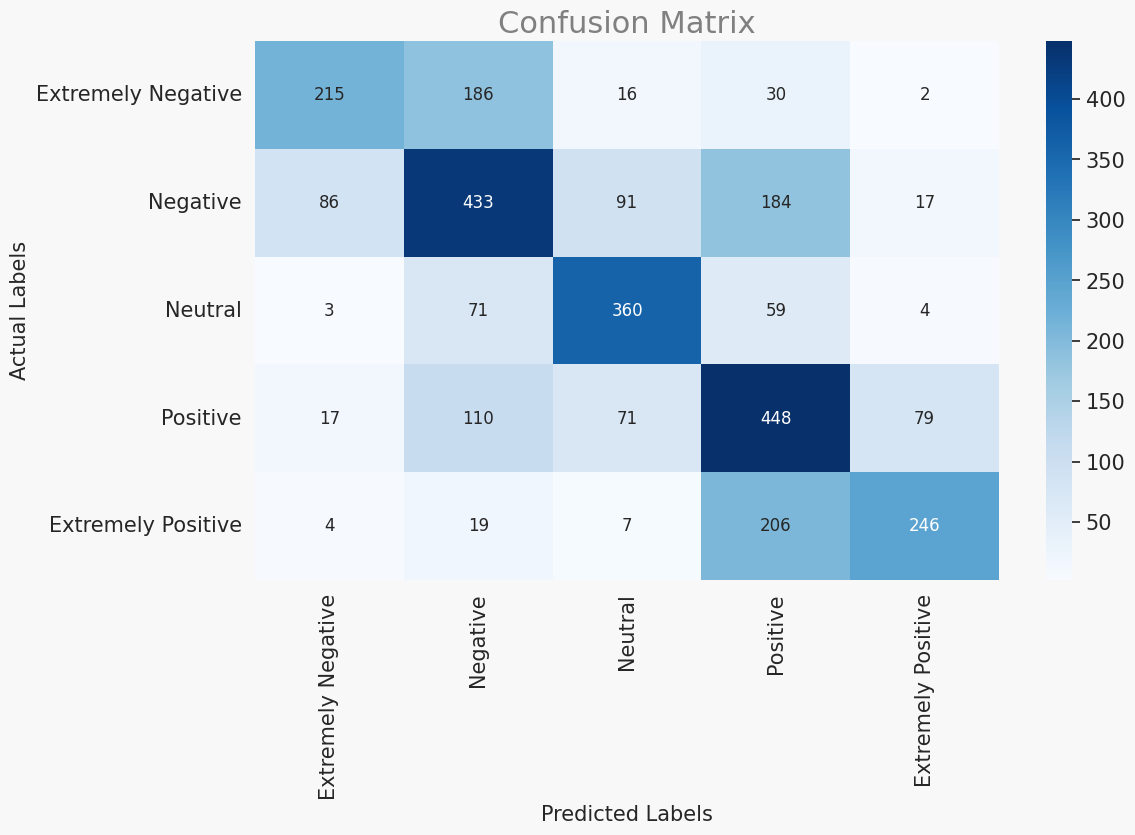

In [ ]:
# Generating and Visualizing Confusion Matrix for Logistic Regression

from sklearn.metrics import confusion_matrix

# Mapping between numeric labels and sentiment names
label_mapping = {
    0: "Neutral",
    1: "Positive",
    2: "Extremely Positive",
    -1: "Negative",
    -2: "Extremely Negative"
}

yPred = clf_logReg_pipe.predict(XTest)

labels = sorted(test['Sentiment'].unique())
conf = confusion_matrix(yTest, yPred, labels=labels)

label_names = [label_mapping[label] for label in labels]

# Confusion matrix DataFrame with sentiment names
cm = pd.DataFrame(conf, index=label_names, columns=label_names)

plt.figure(figsize=(12, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()


Prediction on evaluation dataset

In [ ]:
# Load tweet dataset to a new frame
tweet_lg = pd.read_csv('covid19_tweets.csv')

tweet_lg['text'] = tweet_lg['text'].fillna('')

# Predict sentiment using the 'text' column of the tweet Dataset
tweet_lg['predicted_sentiment'] = clf_logReg_pipe.predict(tweet_lg['text'])

In [ ]:
print(tweet_lg[['text', 'predicted_sentiment']])

                                                     text  predicted_sentiment
0       If I smelled the scent of hand sanitizers toda...                    1
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...                    1
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...                    1
3       @brookbanktv The one gift #COVID19 has give me...                    0
4       25 July : Media Bulletin on Novel #CoronaVirus...                    1
...                                                   ...                  ...
179103  Thanks @IamOhmai for nominating me for the @WH...                    1
179104  2020! The year of insanity! Lol! #COVID19 http...                    1
179105  @CTVNews A powerful painting by Juan Lucena. I...                   -1
179106  More than 1,200 students test positive for #CO...                    1
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...                   -2

[179108 rows x 2 columns]


# 2.Multinomial Naive Bayes Model

In [ ]:
# Assigning Training and Test Sets
XTrain = train['OriginalTweet']
yTrain = train['Sentiment']
XTest = test['OriginalTweet']
yTest = test['Sentiment']

In [ ]:
# Building and Training a Naive Bayes Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()),
                             ("tfidf", TfidfTransformer()),
                             ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(XTrain, yTrain)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

In [ ]:
# predict accuracy
predictedMultiNB = clf_multiNB_pipe.predict(XTest)
np.mean(predictedMultiNB == yTest)

0.3586369770580297

In [ ]:
print(classification_report(yTest, clf_multiNB_pipe.predict(XTest)))

              precision    recall  f1-score   support

          -2       0.80      0.02      0.03       449
          -1       0.40      0.43      0.42       811
           0       0.82      0.09      0.17       497
           1       0.32      0.88      0.47       725
           2       0.95      0.04      0.07       482

    accuracy                           0.36      2964
   macro avg       0.66      0.29      0.23      2964
weighted avg       0.60      0.36      0.27      2964



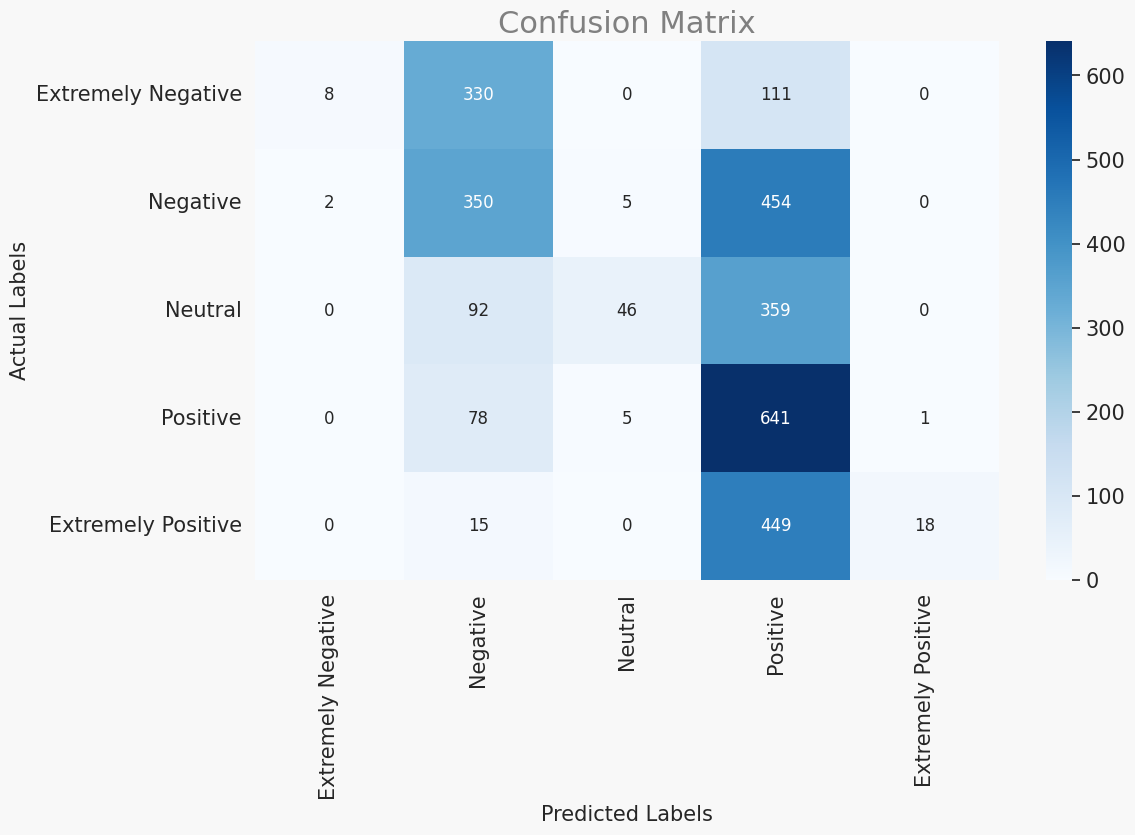

In [ ]:
# Evaluating Naive Bayes Model with Confusion Matrix
yPred = clf_multiNB_pipe.predict(XTest)

labels = sorted(test['Sentiment'].unique())  # Numeric labels in sorted order
conf = confusion_matrix(yTest, yPred, labels=labels)

label_names = [label_mapping[label] for label in labels]

# Confusion matrix DataFrame with sentiment names
cm = pd.DataFrame(conf, index=label_names, columns=label_names)

plt.figure(figsize=(12, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

Prediction on evaluation dataset



In [ ]:
# Load tweet dataset to a new frame
nv_new_data = pd.read_csv('covid19_tweets.csv')

# Predict sentiment using the 'text' column of the new DataFrame
nv_new_data['predicted_sentiment'] = clf_multiNB_pipe.predict(nv_new_data['text'])

print(nv_new_data[['text', 'predicted_sentiment']])

                                                     text  predicted_sentiment
0       If I smelled the scent of hand sanitizers toda...                    1
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...                    1
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...                    1
3       @brookbanktv The one gift #COVID19 has give me...                    1
4       25 July : Media Bulletin on Novel #CoronaVirus...                    1
...                                                   ...                  ...
179103  Thanks @IamOhmai for nominating me for the @WH...                    1
179104  2020! The year of insanity! Lol! #COVID19 http...                    1
179105  @CTVNews A powerful painting by Juan Lucena. I...                    1
179106  More than 1,200 students test positive for #CO...                    1
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...                    1

[179108 rows x 2 columns]


# 3.Linear Support Vector Machine (SVC)

In [ ]:
# Building and Training a Linear SVC Pipeline
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()),
                             ("tfidf", TfidfTransformer()),
                             ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(XTrain, yTrain)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_linearSVC', LinearSVC())])

In [ ]:
# predict accuracy
predictedLinearSVC = clf_linearSVC_pipe.predict(XTest)
np.mean(predictedLinearSVC == yTest)

0.5674763832658569

In [ ]:
print(classification_report(yTest, clf_linearSVC_pipe.predict(XTest)))

              precision    recall  f1-score   support

          -2       0.59      0.58      0.59       449
          -1       0.52      0.46      0.49       811
           0       0.64      0.71      0.67       497
           1       0.49      0.53      0.51       725
           2       0.68      0.64      0.66       482

    accuracy                           0.57      2964
   macro avg       0.58      0.58      0.58      2964
weighted avg       0.57      0.57      0.57      2964



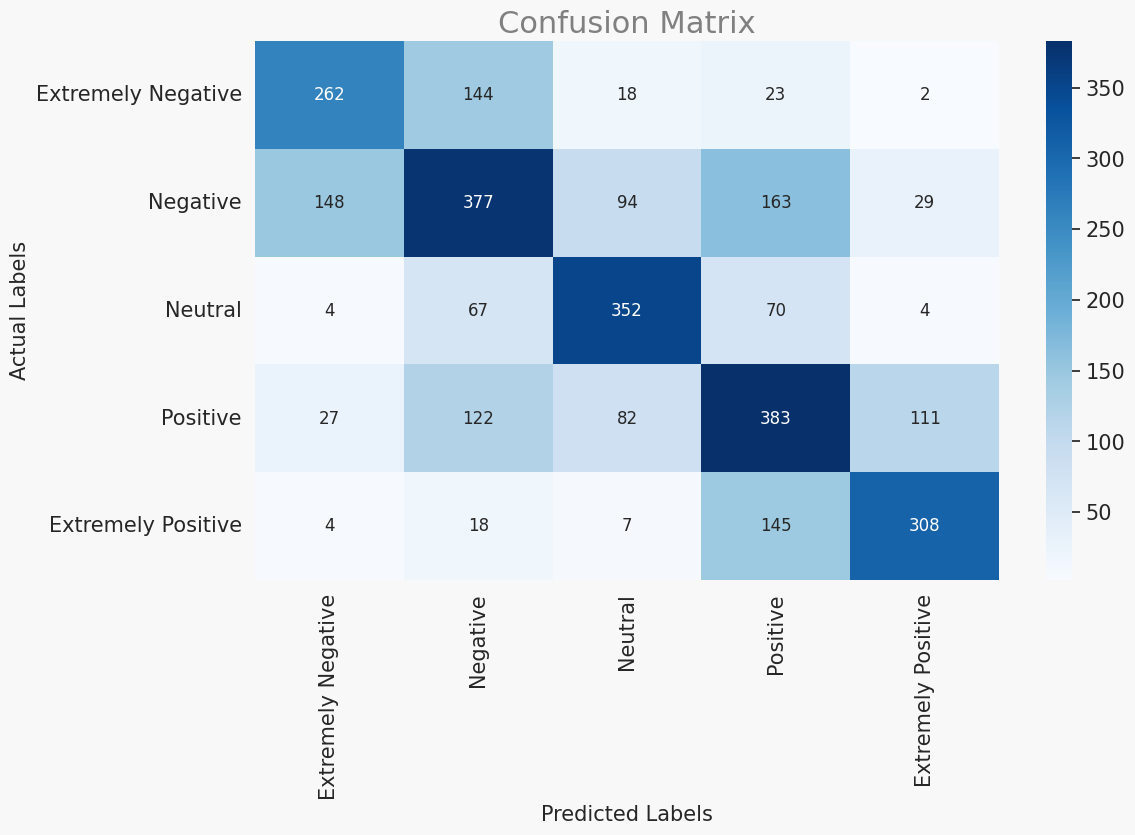

In [ ]:
# Generating and Visualizing the Confusion Matrix
yPred = clf_linearSVC_pipe.predict(XTest)

labels = sorted(test['Sentiment'].unique())
conf = confusion_matrix(yTest, yPred, labels=labels)

label_names = [label_mapping[label] for label in labels]

# Confusion matrix DataFrame with sentiment names
cm = pd.DataFrame(conf, index=label_names, columns=label_names)

plt.figure(figsize=(12, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

Prediction on evaluation dataset

In [ ]:
# Load tweet dataset to a new frame
svm_new_data = pd.read_csv('covid19_tweets.csv')

# Predict sentiment using the 'text' column (raw text) of the new DataFrame
svm_new_data['predicted_sentiment'] = clf_linearSVC_pipe.predict(svm_new_data['text'])

print(svm_new_data[['text', 'predicted_sentiment']])

                                                     text  predicted_sentiment
0       If I smelled the scent of hand sanitizers toda...                    1
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...                   -1
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...                    0
3       @brookbanktv The one gift #COVID19 has give me...                    2
4       25 July : Media Bulletin on Novel #CoronaVirus...                    1
...                                                   ...                  ...
179103  Thanks @IamOhmai for nominating me for the @WH...                    1
179104  2020! The year of insanity! Lol! #COVID19 http...                   -2
179105  @CTVNews A powerful painting by Juan Lucena. I...                    1
179106  More than 1,200 students test positive for #CO...                    1
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...                   -2

[179108 rows x 2 columns]


# 4.Fine Tune Linear SVC Model

In [ ]:
# Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
             'tfidf__use_idf': (True, False),
             }
gs_clf_LinearSVC_pipe = GridSearchCV(clf_linearSVC_pipe, parameters, n_jobs=-1)
gs_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.fit(XTrain,
                                                  yTrain)

In [ ]:
# predict accuracy
predictedGS_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.predict(XTest)
np.mean(predictedGS_clf_LinearSVC_pipe == yTest)

0.5748987854251012

In [ ]:
print(classification_report(yTest, gs_clf_LinearSVC_pipe.predict(XTest)))

              precision    recall  f1-score   support

          -2       0.59      0.60      0.60       449
          -1       0.53      0.47      0.50       811
           0       0.66      0.76      0.71       497
           1       0.49      0.51      0.50       725
           2       0.65      0.64      0.65       482

    accuracy                           0.57      2964
   macro avg       0.59      0.60      0.59      2964
weighted avg       0.57      0.57      0.57      2964



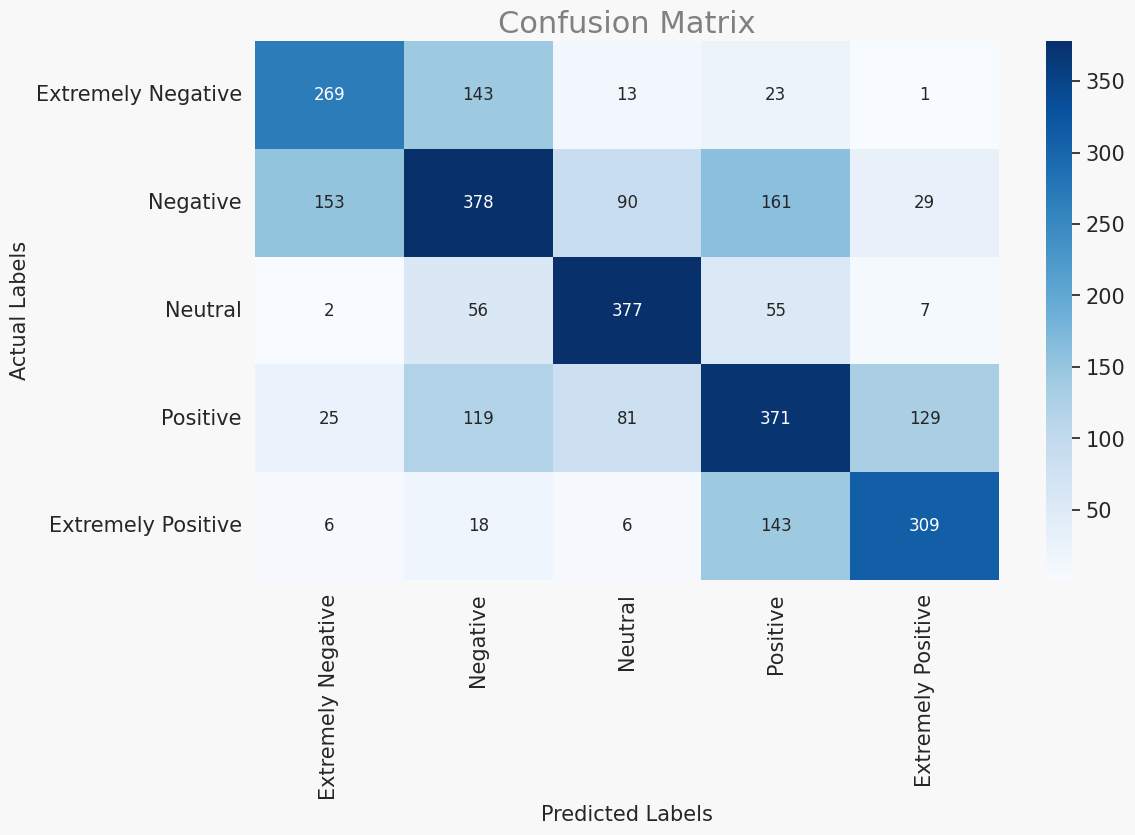

In [ ]:
# Model Evaluation with Confusion Matrix
yPred = gs_clf_LinearSVC_pipe.predict(XTest)

labels = sorted(test['Sentiment'].unique())
conf = confusion_matrix(yTest, yPred, labels=labels)

label_names = [label_mapping[label] for label in labels]

# Confusion matrix DataFrame with sentiment names
cm = pd.DataFrame(conf, index=label_names, columns=label_names)

plt.figure(figsize=(12, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

Prediction on evaluation dataset

In [ ]:
# Load tweet dataset to a new frame
fine_tune_svm_new_data = pd.read_csv('covid19_tweets.csv')

# Predict sentiment using the 'text' column of the new DataFrame
fine_tune_svm_new_data['predicted_sentiment'] = gs_clf_LinearSVC_pipe.predict(fine_tune_svm_new_data['text'])

print(fine_tune_svm_new_data[['text', 'predicted_sentiment']])

                                                     text  predicted_sentiment
0       If I smelled the scent of hand sanitizers toda...                    1
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...                    1
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...                    0
3       @brookbanktv The one gift #COVID19 has give me...                    2
4       25 July : Media Bulletin on Novel #CoronaVirus...                    1
...                                                   ...                  ...
179103  Thanks @IamOhmai for nominating me for the @WH...                    1
179104  2020! The year of insanity! Lol! #COVID19 http...                   -2
179105  @CTVNews A powerful painting by Juan Lucena. I...                    1
179106  More than 1,200 students test positive for #CO...                    1
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...                   -2

[179108 rows x 2 columns]


#5.Random Forest Model



In [ ]:
# Random Forest Classifier Pipeline Setup and Training
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
rf_clf = Pipeline([("vect", CountVectorizer()),
                             ("tfidf", TfidfTransformer()),
                             ("rf_clf", RandomForestClassifier())])
rf_clf.fit(XTrain, yTrain)



Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('rf_clf', RandomForestClassifier())])

In [ ]:
# predict accuracy
predictedrf_clf = rf_clf.predict(XTest)
np.mean(predictedrf_clf == yTest)

0.5192307692307693

In [ ]:
print(classification_report(yTest, rf_clf.predict(XTest)))

              precision    recall  f1-score   support

          -2       0.66      0.40      0.50       449
          -1       0.48      0.48      0.48       811
           0       0.58      0.71      0.64       497
           1       0.43      0.60      0.50       725
           2       0.71      0.37      0.49       482

    accuracy                           0.52      2964
   macro avg       0.57      0.51      0.52      2964
weighted avg       0.55      0.52      0.52      2964



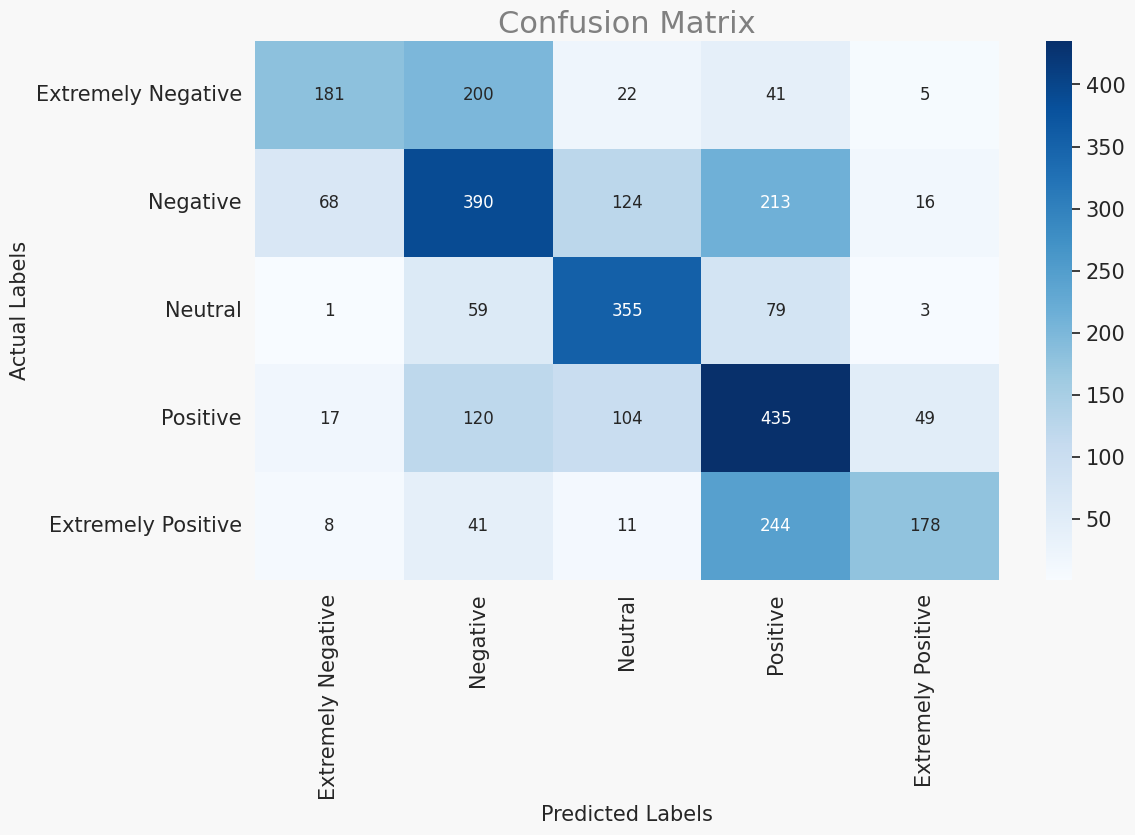

In [ ]:
# Model Evaluation for Random Forest Classifier
yPred = rf_clf.predict(XTest)

labels = sorted(test['Sentiment'].unique())
conf = confusion_matrix(yTest, yPred, labels=labels)

label_names = [label_mapping[label] for label in labels]

# Confusion matrix DataFrame with sentiment names
cm = pd.DataFrame(conf, index=label_names, columns=label_names)

plt.figure(figsize=(12, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

In [ ]:
# Load tweet dataset to a new frame
rf_new_data = pd.read_csv('covid19_tweets.csv', low_memory=False)

# Handling possible missing values in the 'text' column
rf_new_data['text'] = rf_new_data['text'].fillna('').astype(str)

# Predict sentiment using the 'text' column of the new DataFrame
rf_new_data['predicted_sentiment'] = rf_clf.predict(rf_new_data['text'])

print(rf_new_data[['text', 'predicted_sentiment']])

                                                     text  predicted_sentiment
0       If I smelled the scent of hand sanitizers toda...                    1
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...                   -1
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...                    1
3       @brookbanktv The one gift #COVID19 has give me...                    0
4       25 July : Media Bulletin on Novel #CoronaVirus...                    1
...                                                   ...                  ...
179103  Thanks @IamOhmai for nominating me for the @WH...                    1
179104  2020! The year of insanity! Lol! #COVID19 http...                    1
179105  @CTVNews A powerful painting by Juan Lucena. I...                   -1
179106  More than 1,200 students test positive for #CO...                    1
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...                   -1

[179108 rows x 2 columns]


# 6.Recurrent Neural Network (RNN)

XTrain_pad shape: (41157, 54)
XTest_pad shape: (2964, 54)
Number of classes: 5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (1, 54, 16)                 │         574,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (1, 54, 512)                │         559,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (1, 512)                    │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (1, 512)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (1, 64)                     │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (1, 64)                     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (1, 5)                      │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,166,661 (4.45 MB)

 Trainable params: 1,166,661 (4.45 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 438s 337ms/step - accuracy: 0.3863 - loss: 1.3869 - val_accuracy: 0.7200 - val_loss: 0.7610
Epoch 2/5
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 439s 335ms/step - accuracy: 0.7755 - loss: 0.6478 - val_accuracy: 0.7554 - val_loss: 0.6702
Epoch 3/5
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 429s 334ms/step - accuracy: 0.8485 - loss: 0.4689 - val_accuracy: 0.7456 - val_loss: 0.7097
Epoch 4/5
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 444s 336ms/step - accuracy: 0.8849 - loss: 0.3666 - val_accuracy: 0.7510 - val_loss: 0.7341
Epoch 5/5
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 447s 339ms/step - accuracy: 0.9049 - loss: 0.3081 - val_accuracy: 0.7513 - val_loss: 0.7854
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.7444 - loss: 0.8021
Test Accuracy: 0.7513


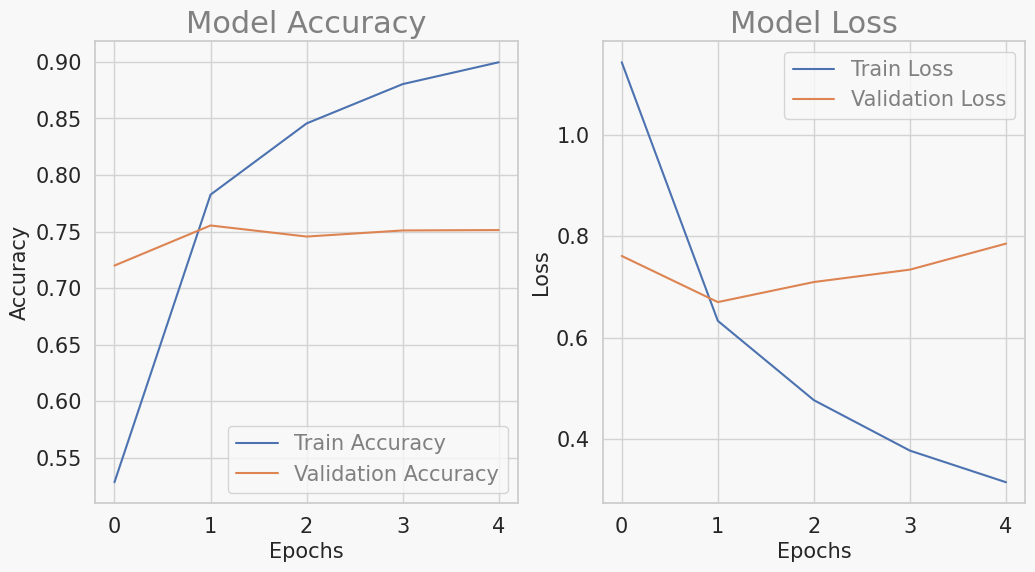

In [ ]:
# Importing Libraries for Text Preprocessing and RNN Model Development
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(XTrain)
vocab_size = len(tokenizer.word_index) + 1  # Total number of words in vocabulary

# Convert text to sequences
XTrain_seq = tokenizer.texts_to_sequences(XTrain)
XTest_seq = tokenizer.texts_to_sequences(XTest)

# Pad the sequences
max_len = max(len(x) for x in XTrain_seq)  # Maximum sequence length
XTrain_pad = pad_sequences(XTrain_seq, maxlen=max_len, padding='post')
XTest_pad = pad_sequences(XTest_seq, maxlen=max_len, padding='post')

print(f"XTrain_pad shape: {XTrain_pad.shape}")
print(f"XTest_pad shape: {XTest_pad.shape}")

# Encode the labels
label_encoder = LabelEncoder()
yTrain_enc = label_encoder.fit_transform(yTrain)
yTest_enc = label_encoder.transform(yTest)

print(f"Number of classes: {len(label_encoder.classes_)}")

# Clear previous TensorFlow sessions
tf.keras.backend.clear_session()

# Hyperparameters
EPOCHS = 5
BATCH_SIZE = 32
embedding_dim = 16
units = 256

# Define the RNN model
model = tf.keras.Sequential([
    L.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=XTrain_pad.shape[1]),
    L.Bidirectional(L.LSTM(units, return_sequences=True)),
    L.GlobalMaxPool1D(),
    L.Dropout(0.4),
    L.Dense(64, activation="relu"),
    L.Dropout(0.4),
    L.Dense(len(label_encoder.classes_))  # Number of output classes
])

# Compile the model
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

# Call the model with a dummy input to build the layers
dummy_input = tf.random.uniform((1, XTrain_pad.shape[1]))  # A single sample with max_len tokens
model(dummy_input)

model.summary()

# Train the model
history = model.fit(
    XTrain_pad,
    yTrain_enc,
    validation_data=(XTest_pad, yTest_enc),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(XTest_pad, yTest_enc)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Predict sentiments for a new dataset and save to CSV
# Load the dataset to a new frame
new_data_rnn = pd.read_csv('covid19_tweets.csv')

# Handle missing values in the 'text' column (replace NaN with empty strings)
new_data_rnn['text'] = new_data_rnn['text'].fillna('').astype(str)

# Tokenize the text data from the new dataset
new_data_rnn_seq = tokenizer.texts_to_sequences(new_data_rnn['text'])

# Pad the sequences to match the training data's maximum length
new_data_rnn_pad = pad_sequences(new_data_rnn_seq, maxlen=max_len, padding='post')

# Predict sentiments for the new dataset
new_data_rnn_predictions = tf.argmax(model.predict(new_data_rnn_pad), axis=1).numpy()

# Decode predictions back to their original labels
new_data_rnn['predicted_sentiment'] = label_encoder.inverse_transform(new_data_rnn_predictions)

# Save the results to a CSV file
new_data_rnn.to_csv('covid19_tweets_with_predicted_output.csv', index=False)

print("Predicted sentiments saved to 'covid19_tweets_with_predicted_output.csv'.")

5598/5598 ━━━━━━━━━━━━━━━━━━━━ 513s 92ms/step
Predicted sentiments saved to 'covid19_tweets_with_predicted_output.csv'.


# 6.1 Predicted Sentiment count on Evaluation dataset (using RNN)

In [ ]:
# Load the COVID-19 tweets dataset
file_path = "covid19_tweets_with_predicted_output.csv"
tweets_df = pd.read_csv(file_path)

print(tweets_df[['text', 'predicted_sentiment']].head())

                                                text  predicted_sentiment
0  If I smelled the scent of hand sanitizers toda...                  1.0
1  Hey @Yankees @YankeesPR and @MLB - wouldn't it...                 -1.0
2  @diane3443 @wdunlap @realDonaldTrump Trump nev...                 -1.0
3  @brookbanktv The one gift #COVID19 has give me...                  2.0
4  25 July : Media Bulletin on Novel #CoronaVirus...                  1.0


<ipython-input-71-234b080b06a0>:3: DtypeWarning: Columns (7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_df = pd.read_csv(file_path)


<ipython-input-72-b0f19b57e170>:2: DtypeWarning: Columns (7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_df = pd.read_csv(file_path)
<ipython-input-72-b0f19b57e170>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_counts, x="frequency", y="sentiment", palette="coolwarm", orient="h")


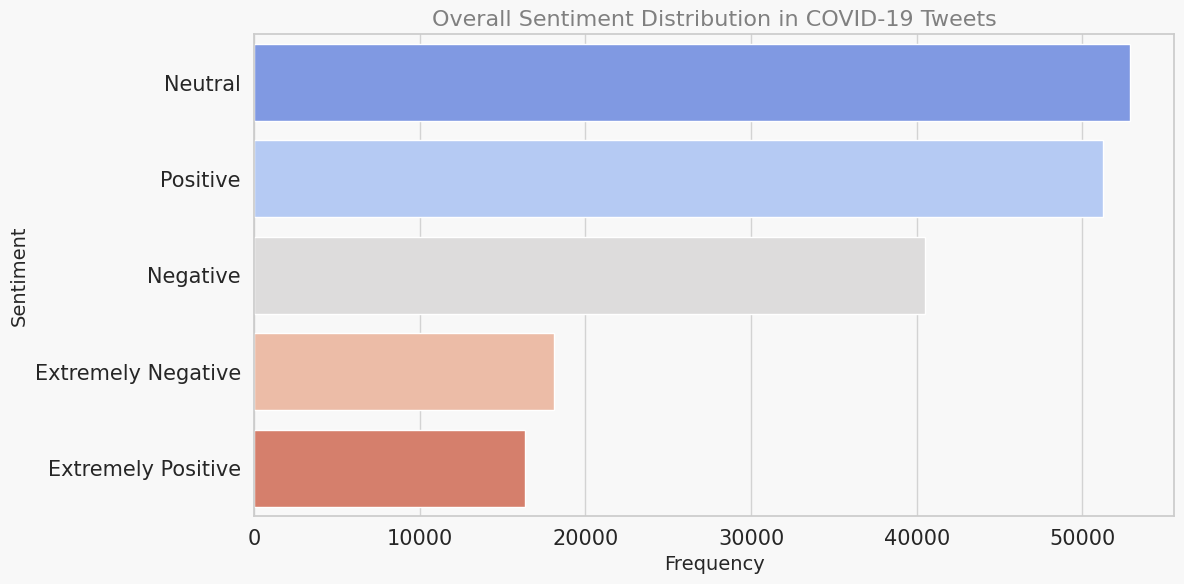

In [ ]:
# Visualizing Sentiment Distribution in COVID-19 Tweets
file_path = "covid19_tweets_with_predicted_output.csv"
tweets_df = pd.read_csv(file_path)

tweet_column = "text"
sentiment_column = "predicted_sentiment"

# Mapping between numeric sentiment values and sentiment labels
sentiment_mapping = {
    0: "Neutral",
    1: "Positive",
    2: "Extremely Positive",
    -1: "Negative",
    -2: "Extremely Negative"
}

tweets_df[sentiment_column] = tweets_df[sentiment_column].map(sentiment_mapping)

# Frequencies of each sentiment
sentiment_counts = tweets_df[sentiment_column].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'frequency']

plt.figure(figsize=(12, 6))
sns.barplot(data=sentiment_counts, x="frequency", y="sentiment", palette="coolwarm", orient="h")
plt.title("Overall Sentiment Distribution in COVID-19 Tweets", fontsize=16)
plt.xlabel("Frequency", fontsize=14)
plt.ylabel("Sentiment", fontsize=14)
plt.tight_layout()
plt.show()

# 7.Models comparison

In [ ]:
# Evaluating and Comparing Model Performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
import pandas as pd

def evaluate_model(model, X_test, y_test, model_name, is_rnn=False):
    """Evaluates a model and returns a dictionary of metrics."""
    if is_rnn:
        y_pred = tf.argmax(model.predict(X_test), axis=1).numpy()
        y_pred_labels = label_encoder.inverse_transform(y_pred)
    else:
        y_pred = model.predict(X_test)
        y_pred_labels = y_pred

    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred_labels),
        "Precision": precision_score(y_test, y_pred_labels, average='weighted'),
        "Recall": recall_score(y_test, y_pred_labels, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred_labels, average='weighted')
    }

models = [
    (clf_logReg_pipe, "Logistic Regression", False),
    (clf_linearSVC_pipe, "SVM", False),
    (gs_clf_LinearSVC_pipe, "Fine-Tuned SVM", False),
    (clf_multiNB_pipe, "Naive Bayes", False),
    (rf_clf, "Random Forest", False),
    (model, "RNN", True)
]

results = [evaluate_model(model, XTest_pad if is_rnn else XTest, yTest, name, is_rnn) for model, name, is_rnn in models]

print(pd.DataFrame(results))

93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.574224   0.588798  0.574224  0.574451
1                  SVM  0.567476   0.567431  0.567476  0.566454
2       Fine-Tuned SVM  0.574899   0.572207  0.574899  0.572432
3          Naive Bayes  0.358637   0.601545  0.358637  0.273628
4        Random Forest  0.519231   0.548542  0.519231  0.515859
5                  RNN  0.751350   0.758823  0.751350  0.753295
